# 3.8 연습 문제

## 문제 3

**타이타닉(Titanic)** 데이터셋에 도전해보자.

- 캐글에서 시작하면 좋다.
  - [https://www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic)

<br>

## 데이터셋 불러오기

### 구글 드라이브 연동

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<br>

### 데이터셋 경로 지정

In [17]:
import os

TITANIC_PATH = os.path.join('./drive/MyDrive/Colab Notebooks/datasets', 'titanic')

<br>

### 데이터 읽기 함수 정의

In [17]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

<br>

### 데이터 불러오기

In [18]:
train_data = load_titanic_data('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
test_data = load_titanic_data('test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<br>

## 데이터 탐색

### 특성 의미 확인

- `Survived`: 타깃입니다.
  - `0` : 생존하지 못한 것
  - `1` : 생존을 의미
- `Pclass`: 승객 등급. 1, 2, 3등석.
- `Name`, `Sex`, `Age`: 이름 그대로 의미입니다.
- `SibSp`: 함께 탑승한 형제, 배우자의 수.
- `Parch`: 함께 탑승한 자녀, 부모의 수.
- `Ticket`: 티켓 아이디
- `Fare`: 티켓 요금 (파운드)
- `Cabin`: 객실 번호
- `Embarked`: 승객이 탑승한 곳. 
  - `C` : Cherbourg
  - `Q` : Queenstown
  - `S` : Southampton

<br>

### 결측치 확인 및 특성별 활용 방안 정의

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- `Age`, `Cabin`, `Embarked` 속성의 일부가 `null`입니다.  
(891개의 `non-null` 보다 작습니다).

- 특히 `Cabin`은 77%가 null입니다.
- 일단 `Cabin`은 무시하고 나머지를 활용하겠습니다.

- `Age`는 19%가 null이므로 이를 어떻게 처리할지 결정해야 합니다.
- null을 **중간 나이**로 바꾸는 것이 괜찮아 보입니다.

- `Name`과 `Ticket` 속성도 값을 가지고 있지만 머신러닝 모델이 사용할 수 있는 숫자로 변환하는 것이 조금 까다롭습니다.
- 그래서 지금은 이 두 속성을 무시하겠습니다.

<br>

### 특성별 통계 정보 확인

In [21]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 38% 만 `Survived` 이다.
- 거의 40% 에 가까우므로 정확도를 사용해 모델을 평가해도 괜찮을 것 같습니다.

- 평균 `Fare`는 32.20 파운드라 그렇게 비싸보이지는 않습니다.  
(아마 요금을 많이 반환해 주었기 때문일 것입니다)

- 평균 `Age`는 30보다 작습니다.

<br>

### 범주형 특성 데이터 분포 확인

In [22]:
# 타깃 특성
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [23]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<br>

## 전처리 파이프라인 생성

- 아래 코드는 `Pipeline`, `FeatureUnion`와 사용자 정의 `DataFrameSelector` 클래스를 사용해 각 열을 다르게 전처리한다.
- 사이킷런 0.20 부터는 `ColumnTransformer`를 사용하는 것이 좋다.

<br>

### 특성 선택 변환기

- `DataFrameSelector` : DataFrame에서 특정 열을 선택하는 변환기

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

<br>

### 숫자 특성 처리 파이프라인

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('select_numeric', DataFrameSelector(['Age', 'SibSp', 'Parch', 'Fare'])), # 수치형 특성 선택
    ('imputer', SimpleImputer(strategy='median')) # 결측치 중앙값 처리
])

In [28]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

<br>

### 범주형 특성 결측치 처리 클래스

- 문자열로 된 범주형 열을 위해 별도의 `Imputer` 클래스 필요
- 일반 `SimpleImputer` 클래스는 이를 처리하지 못함
- stackoverflow.com/questions/25239958 에서 착안했습니다

In [32]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X], index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

<br>

### 범주형 특성 처리 파이프라인

In [33]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ('select_cat', DataFrameSelector(['Pclass', 'Sex', 'Embarked'])), # 범주형 특성 선택
    ('imputer', MostFrequentImputer()), # 결측치 최빈값 처리
    ('cat_encoder', OneHotEncoder(sparse=False)) # 원핫 인코딩
])

In [34]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

<br>

### 숫자 특성, 범주형 특성 파이프라인 연결

In [35]:
from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

<br>

### 전처리 파이프라인 적용

In [36]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

<br>

### cf) `ColumnTransformer` 를 통한 전처리 파이프라인 생성

In [40]:
from sklearn.compose import ColumnTransformer

num_attribs = ['Age', 'SibSp', 'Parch', 'Fare']
cat_attribs = ['Pclass', 'Sex', 'Embarked']

num_pipeline_2 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')) # 결측치 중앙값 처리
])

cat_pipeline_2 = Pipeline([
    ('imputer', MostFrequentImputer()), # 결측치 최빈값 처리
    ('cat_encoder', OneHotEncoder(sparse=False)) # 원핫 인코딩
])

preprocess_pipeline_2 = ColumnTransformer([
    ('num', num_pipeline_2, num_attribs),
    ('cat', cat_pipeline_2, cat_attribs)
])

X_train_2 = preprocess_pipeline_2.fit_transform(train_data)
X_train_2

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

<br>

## 레이블 생성

In [41]:
y_train = train_data['Survived']

<br>

## 분류기 훈련 및 평가

### `SVC` 분류기 학습

In [43]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<br>

### `SVC` 분류기 이용 예측 생성

In [44]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)

In [46]:
y_pred[:30]

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0])

<br>

### 교차 검증을 통한 `SVC` 모델 평가

In [47]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.7329588014981274

<br>

### `RandomForestClassifier` 분류기 적용

In [48]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8126466916354558

<br>

### 교차 검증 점수 시각화

- 10 폴드 교차 검증에 대한 평균 정확도를 보는 대신 모델에서 얻은 10개의 점수를 1사분위, 3사분위를 명료하게 표현해주는 상자 수염 그림(box-and-whisker) 그래프를 만들어보자.
- `boxplot()` 함수는 이상치(flier, 플라이어)를 감지하고 수염 부분에 이를 포함시키지 않는다.
- 1사분위 : $Q_1$
- 3사분위 : $Q_3$
- 사분위수 범위 : $IQR = Q_3 - Q_1$ (박스의 높이)
- 이상치 판단 기준
  - $Q_1 - 1.5 \times IQR$ 보다 낮거나 $Q_3 + 1.5 \times IQR$ 보다 높은 점수는 이상치로 간주된다.

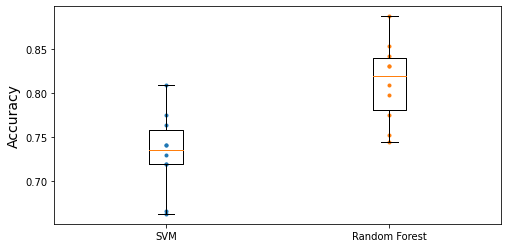

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, '.')
plt.plot([2]*10, forest_scores, '.')
plt.boxplot([svm_scores, forest_scores], labels=['SVM', 'Random Forest'])
plt.ylabel('Accuracy', fontsize=14)

plt.show()

<br>

## 성능 향상

### 하이퍼파라미터 튜닝

- 교차 검증과 그리드 탐색을 사용하여 더 많은 모델을 비교하고 하이퍼파라미터를 튜닝

<br>

### 특성 공학 시도

- `SibSp`와 `Parch`을 이 두 특성의 합으로 바꿉니다.
- `Survived` 특성과 관련된 이름을 구별해 보세요
  - 가령, 이름에 "Countess"가 있는 경우 생존할 가능성이 높습니다.


<br>

### 수치 특성을 범주형 특성으로 변환

- 나이대가 다른 경우 다른 생존 비율을 가질 수 있습니다.
- 그러므로 나이 구간을 범주로 만들어 나이 대신 사용하는 것이 도움이 될 수 있다.

In [53]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


- 비슷하게 생존자의 30%가 혼자 여행하는 사람이기 때문에 이들을 위한 특별한 범주를 만드는 것이 도움이 될 수 있다.

In [54]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000
